In [2]:
import ocr_text_extraction as ocr

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pytesseract

In [73]:
def _preprocess_white_text(im):
    im= cv2.bilateralFilter(im,5, 55,60)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    _, im = cv2.threshold(im, 245, 255, cv2.THRESH_BINARY_INV)
    return im

def _preprocess_black_text(im):
    im= cv2.bilateralFilter(im,5, 55,60)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    _, im = cv2.threshold(im, 220, 255, cv2.THRESH_BINARY)
    return im

def print_image(img:np.array):
    # img=np.array(Image.open(img_path + img))
    plt.figure(figsize=(4,4))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
    plt.show()

char_whitelist = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz!?. '

def extract_text_wprocessing(img_path:str, preprocess:str=None, print_processed_img:bool=False, print_text:bool=True):
    custom_config = r"--oem 1 --psm 12 -c tessedit_char_whitelist='ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz!?. '"
    img=np.array(Image.open(img_path))
    
    if preprocess and preprocess == "white":
        img=_preprocess_white_text(img)
    elif preprocess and preprocess == "black":
        img=_preprocess_black_text(img)    
        
    if print_processed_img:
        print_image(img)
    
    text = pytesseract.image_to_string(img, lang='eng', config=custom_config).split()
    if print_text:
        print(" ".join(text))#.replace('\n', ' '))
    return text


In [4]:
img_path = "data/Most popular memes templates of 2018/images/kaggle_images/"
img_files = [
    "0aftj33n16y11_redt.jpg",
    "zZKdOQq_imgr.png",
    "0b0je3k3i2b01_redt.jpg",
    "zyuhgg92tsw11_redt.jpg",
    ]

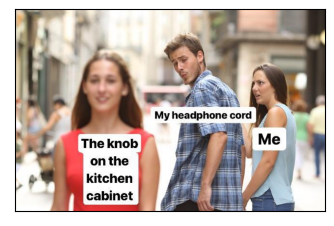

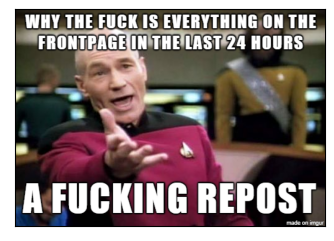

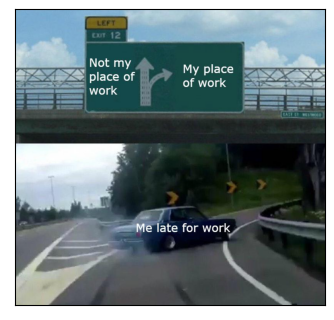

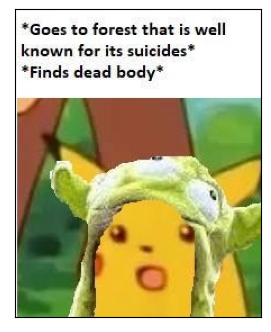

In [27]:
for img in img_files:
    img=np.array(Image.open(img_path + img))
    plt.figure(figsize=(4,4))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show()

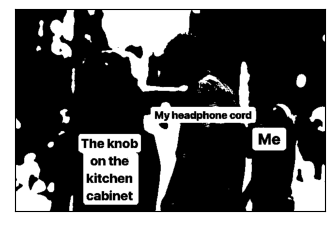

an The knob My headphone cord a se on the f cabinet kitchen a


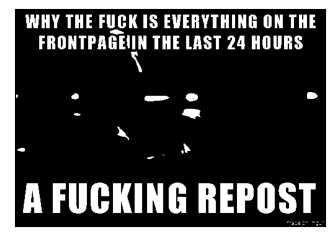

WHY THE FUCK IS EVERYTHING ON THE TCR eC ee UL Lty ra ad Bal BN A Pl att REPOST


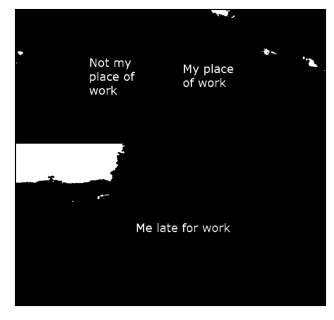

oe Not my Was eltele place of of work work od Me late for work


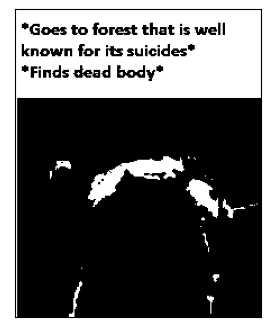

Goes to forest that is well known for its suicides Finds dead body a a


In [74]:
for img in img_files:
    extract_text_wprocessing(img_path + img, "black", True)

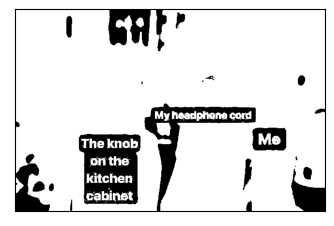

t ae ud ee Bhai me Parade i. res os


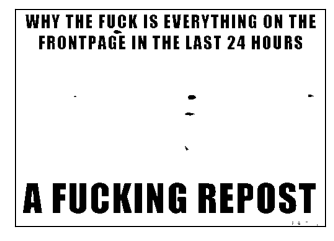

WHY THE FUCK IS EVERYTHING ON THE FRONTPAGE IN THE LAST HOURS A FUCKING REPOST


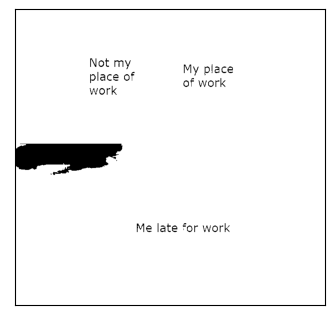

Not my My place place of of work work Me late for work


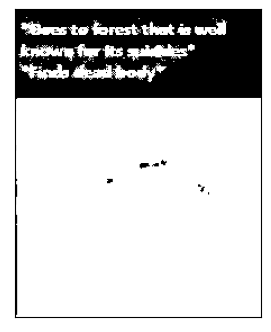

ee spate bie shectummencnall rd


In [75]:
for img in img_files:
    extract_text_wprocessing(img_path + img, "white", True)

In [76]:
# import spacy_fastlang
# import spacy
from spellchecker import SpellChecker


# nlp = spacy.load("en_core_web_sm")
# nlp.add_pipe("language_detector")
spell = SpellChecker()

for img in img_files:
    text_white = extract_text_wprocessing(img_path + img, "white", print_text=False)
    text_black = extract_text_wprocessing(img_path + img, "black", print_text=False)
    
    # res_white = nlp(text_white)
    # res_black = nlp(text_black)
    
    misspelled_white = spell.unknown(text_white)
    misspelled_black = spell.unknown(text_black)
    
    print(text_white)
    print("misspelled words: ", round(len(misspelled_white)/len(text_white), 2))
    # print(f"OCR result tuned for white text: {res_white._.language, res_white._.language_score}\n")
    
    print(text_black)
    print("misspelled words: ", round(len(misspelled_black)/len(text_black), 2), "\n")
    # print(f"OCR result tuned for black text: {res_black._.language, res_white._.language_score}\n")
    

['t', 'ae', 'ud', 'ee', 'Bhai', 'me', 'Parade', 'i.', 'res', 'os']
misspelled words:  0.2
['an', 'The', 'knob', 'My', 'headphone', 'cord', 'a', 'se', 'on', 'the', 'f', 'cabinet', 'kitchen', 'a']
misspelled words:  0.07 

['WHY', 'THE', 'FUCK', 'IS', 'EVERYTHING', 'ON', 'THE', 'FRONTPAGE', 'IN', 'THE', 'LAST', 'HOURS', 'A', 'FUCKING', 'REPOST']
misspelled words:  0.13
['WHY', 'THE', 'FUCK', 'IS', 'EVERYTHING', 'ON', 'THE', 'TCR', 'eC', 'ee', 'UL', 'Lty', 'ra', 'ad', 'Bal', 'BN', 'A', 'Pl', 'att', 'REPOST']
misspelled words:  0.25 

['Not', 'my', 'My', 'place', 'place', 'of', 'of', 'work', 'work', 'Me', 'late', 'for', 'work']
misspelled words:  0.0
['oe', 'Not', 'my', 'Was', 'eltele', 'place', 'of', 'of', 'work', 'work', 'od', 'Me', 'late', 'for', 'work']
misspelled words:  0.07 

['ee', 'spate', 'bie', 'shectummencnall', 'rd']
misspelled words:  0.6
['Goes', 'to', 'forest', 'that', 'is', 'well', 'known', 'for', 'its', 'suicides', 'Finds', 'dead', 'body', 'a', 'a']
misspelled words:  0.0